In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load("svhn_cropped", split="train", shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
image, label = tfds.as_numpy(tfds.load(
    "svhn_cropped",
    split="test",
    batch_size=-1,
    as_supervised=True,
))
print(type(image), image.shape)

<class 'numpy.ndarray'> (26032, 32, 32, 3)


In [ ]:
# ds = ds.batch(32).prefetch(1)
# tfds.benchmark(ds, batch_size=32)
# tfds.benchmark(ds, batch_size=32)

,image,label
0,,4
1,,8
2,,7
3,,2

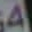
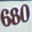
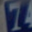
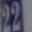

In [ ]:
ds, info = tfds.load("svhn_cropped", split="train", with_info=True)
tfds.as_dataframe(ds.take(4), info)

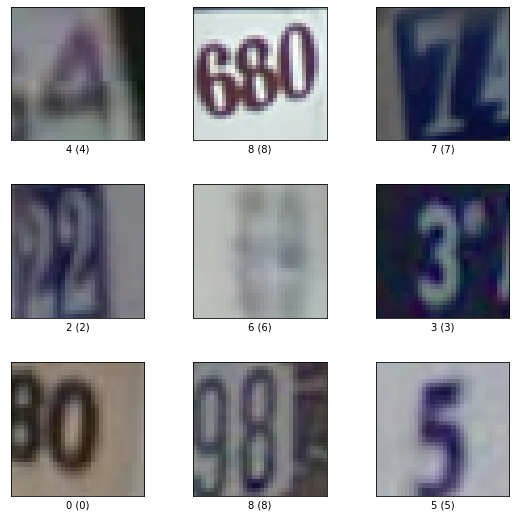

In [ ]:
fig = tfds.show_examples(ds, info)

In [ ]:
train_ds, train_labels = tfds.as_numpy(tfds.load(
    "svhn_cropped",
    split="train",
    batch_size=-1,
    as_supervised=True,
))
val_ds, val_labels = tfds.as_numpy(tfds.load(
    "svhn_cropped",
    split="test",
    batch_size=-1,
    as_supervised=True,
))

In [ ]:
train_ds = train_ds / 255.0
val_ds = val_ds / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    train_labels,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2290/2290 [==============================] - 83s 36ms/step - loss: 0.9221 - accuracy: 0.7070
Epoch 2/10
2290/2290 [==============================] - 83s 36ms/step - loss: 0.4720 - accuracy: 0.8625
Epoch 3/10
2290/2290 [==============================] - 84s 37ms/step - loss: 0.3874 - accuracy: 0.8862
Epoch 4/10
2290/2290 [==============================] - 82s 36ms/step - loss: 0.3404 - accuracy: 0.8988
Epoch 5/10
2290/2290 [==============================] - 84s 37ms/step - loss: 0.3067 - accuracy: 0.9102
Epoch 6/10
2290/2290 [==============================] - 82s 36ms/step - loss: 0.2809 - accuracy: 0.9162
Epoch 7/10
2290/2290 [==============================] - 83s 36ms/step - loss: 0.2570 - accuracy: 0.9235
Epoch 8/10
2290/2290 [==============================] - 83s 36ms/step - loss: 0.2383 - accuracy: 0.9285
Epoch 9/10
2290/2290 [==============================] - 82s 36ms/step - loss: 0.2212 - accuracy: 0.9341
Epoch 10/10
2290/2290 [==============================] - 83s 36ms/step - lo

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(val_ds)

814/814 [==============================] - 10s 12ms/step


In [ ]:
for i in range(9):
    print("-------------")
    print(f"{i}:{predictions[i]}")
    print(np.argmax(predictions[i]))

-------------
0:[0.08565564 0.08699661 0.22759429 0.08579618 0.08561856 0.08561089
 0.08561056 0.08589433 0.08561154 0.08561137]
2
-------------
1:[0.08533676 0.08533676 0.08533683 0.08533676 0.08533677 0.08533676
 0.08533676 0.23196909 0.08533676 0.08533676]
7
-------------
2:[0.08533723 0.08533722 0.23196284 0.08533828 0.085338   0.08533725
 0.08533723 0.08533723 0.08533739 0.08533723]
2
-------------
3:[0.08533674 0.08533675 0.08533677 0.08533674 0.23196909 0.08533677
 0.08533676 0.08533674 0.08533675 0.08533674]
4
-------------
4:[0.08552071 0.08666709 0.0855209  0.08561181 0.22907893 0.08551998
 0.08551798 0.08552245 0.08551823 0.08552182]
4
-------------
5:[0.08620382 0.08643267 0.2177282  0.08898472 0.0863142  0.08620992
 0.08620621 0.08949804 0.08621449 0.0862077 ]
2
-------------
6:[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.23196931 0.08533674 0.08533674 0.08533674]
6
-------------
7:[0.08579694 0.08572153 0.22647151 0.08579887 0.08578183 0.08568776


In [ ]:
for i in range(9):
  print(val_labels[i])

2
7
2
4
4
2
6
2
3


In [ ]:
# !zip -r models.zip saved_model
# from google.colab import files
# files.download("models.zip")

  adding: saved_model/ (stored 0%)
  adding: saved_model/svhn_v2/ (stored 0%)
  adding: saved_model/svhn_v2/variables/ (stored 0%)
  adding: saved_model/svhn_v2/variables/variables.index (deflated 66%)
  adding: saved_model/svhn_v2/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: saved_model/svhn_v2/saved_model.pb (deflated 89%)
  adding: saved_model/svhn_v2/keras_metadata.pb (deflated 91%)
  adding: saved_model/svhn_v2/assets/ (stored 0%)
  adding: saved_model/svhn_v1/ (stored 0%)
  adding: saved_model/svhn_v1/variables/ (stored 0%)
  adding: saved_model/svhn_v1/variables/variables.index (deflated 62%)
  adding: saved_model/svhn_v1/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: saved_model/svhn_v1/saved_model.pb (deflated 88%)
  adding: saved_model/svhn_v1/keras_metadata.pb (deflated 88%)
  adding: saved_model/svhn_v1/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>